# 01 - EDA

Bu notebookta veri yüklenerek veri setine dair eksik veriler,kategorik ve sayısal veriler, tespit edilecektir.


Problem Tanımı

Akciğer kanseri, erken teşhis edilmediğinde yüksek mortaliteye sahip ciddi bir hastalıktır. Mevcut sağlık sistemlerinde, hastalığın erken belirtileri genellikle gözden kaçmakta ve tanı konulması gecikmektedir. Bu durum, hastaların yaşam kalitesini düşürmekte ve tedavi maliyetlerini artırmaktadır.

Bu proje, bireylerin hava kirliliği maruziyeti, yaşam tarzı alışkanlıkları (örneğin sigara kullanımı), demografik özellikleri (yaş, cinsiyet) ve genetik risk faktörleri gibi verileri kullanarak akciğer kanseri risk seviyesini (Low, Medium, High) tahmin eden bir makine öğrenmesi modeli geliştirmeyi amaçlamaktadır.

Amaçlar:

Risk seviyelerini doğru sınıflandırarak erken uyarı sistemi oluşturmak.

Klinik veya bireysel karar destek sistemleri için veri odaklı bir araç sağlamak.

ML modelinin performansını optimize ederek güvenilir ve yorumlanabilir sonuçlar sunmak.

Bu problem, tabular veri üzerinde sınıflandırma problemi olarak formüle edilebilir ve modelin çıktısı, bireyin kanser riski seviyesini temsil eden kategorik bir değişken olacaktır.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [98]:
# Görselleştirme Ayarları
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Kütüphaneler yüklendi!")


✅ Kütüphaneler yüklendi!


In [99]:
# Veri seti yüklendi.
#  İlk 5 satır için kontrol edildi.
df = pd.read_csv(
    "../data/raw/cancer-patient-data-sets.csv",
    encoding="latin1",
    engine="python"
)

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [100]:
#  Son 5 deger kontrol edildi.

df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [101]:
# Satır ve sütun bilgisi kontrol edildi.

df.shape

(1000, 26)

In [102]:
# missing value kontrolü yapıldı.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [103]:
# Veri seti istatistiksel anlamda kontrol edildi.

df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [104]:
#  Kolon isimleri kontrol edildi.
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [105]:
#  null degerler kontrol edildi.

df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [106]:
# Tekrar eden veriler kontrol edildi.
df.duplicated().sum()

np.int64(0)

In [107]:
# Hasta Id sütunu ile işlem yapılmadığı için veri setinden kaldırıldı.

df.drop("Patient Id", axis=1, inplace=True)


In [108]:
df.nunique()

#  Veri setimizde kaç farklı (benzersiz) değer olduğu kontrol edildi.

index                       1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [109]:
#  Gender sütunu için deger kontrolü yapıldı.
df["Gender"].value_counts()

Gender
1    598
2    402
Name: count, dtype: int64

In [110]:
df["Gender"].unique()

array([1, 2])

In [111]:
#  Hedef değişken (target variable) için deger kontrolü yapıldı.

df['Level'].value_counts() 

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [126]:
def tespit_et(col):
    if df[col].nunique() < 15 or df[col].dtype == 'object':
        return "Kategorik"
    else:
        return "Sayısal"

for col in df.columns:
    print(col, "→", tespit_et(col))

    #  Kategorik değişkenler tespit edildi.

index → Sayısal
Age → Sayısal
Gender → Kategorik
Air Pollution → Kategorik
Alcohol use → Kategorik
Dust Allergy → Kategorik
OccuPational Hazards → Kategorik
Genetic Risk → Kategorik
chronic Lung Disease → Kategorik
Balanced Diet → Kategorik
Obesity → Kategorik
Smoking → Kategorik
Passive Smoker → Kategorik
Chest Pain → Kategorik
Coughing of Blood → Kategorik
Fatigue → Kategorik
Weight Loss → Kategorik
Shortness of Breath → Kategorik
Wheezing → Kategorik
Swallowing Difficulty → Kategorik
Clubbing of Finger Nails → Kategorik
Frequent Cold → Kategorik
Dry Cough → Kategorik
Snoring → Kategorik
Level → Kategorik
Smoking_Label → Kategorik


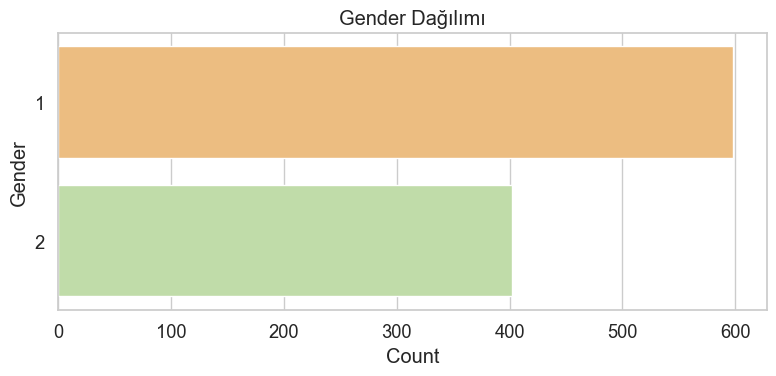

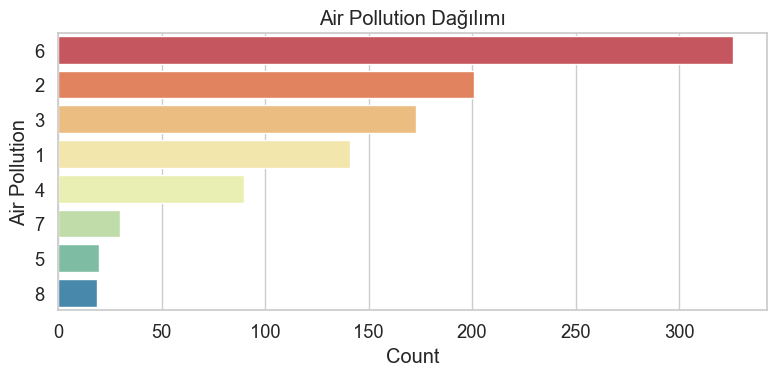

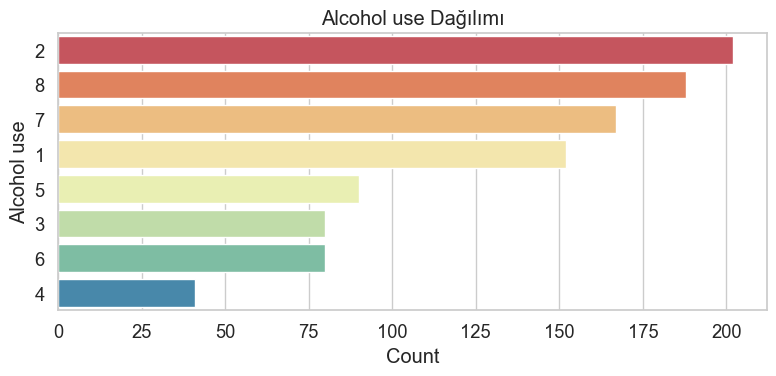

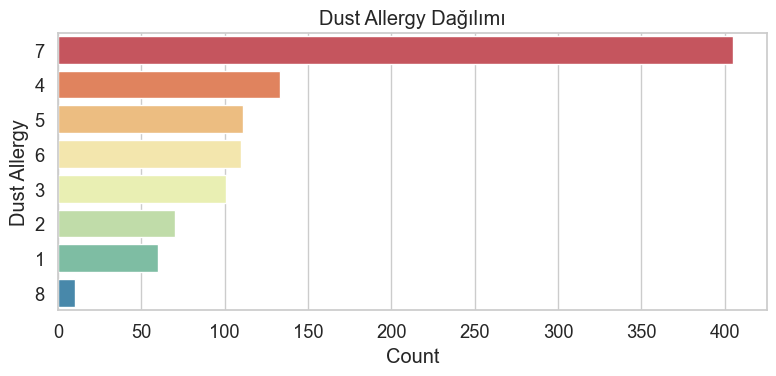

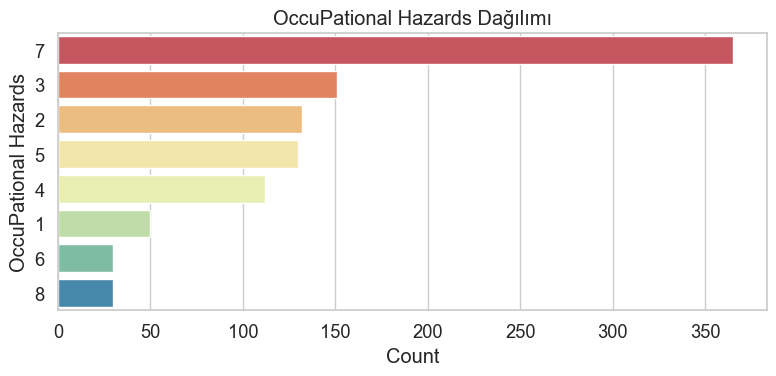

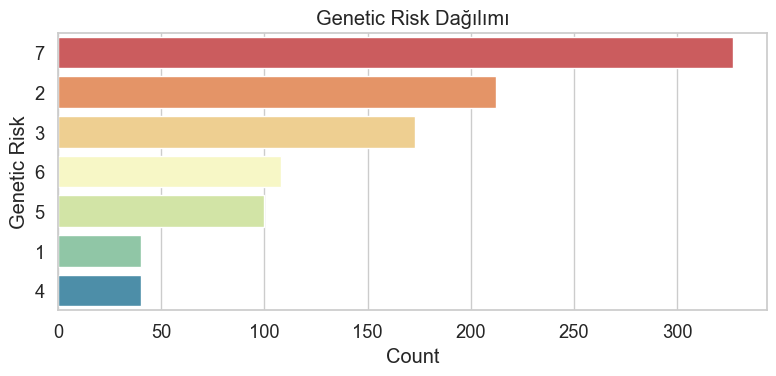

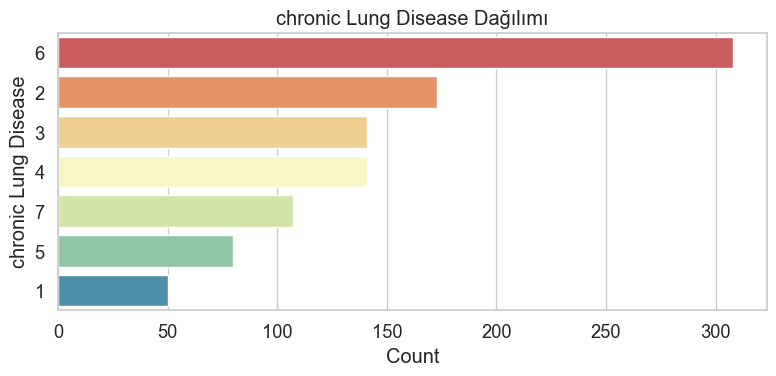

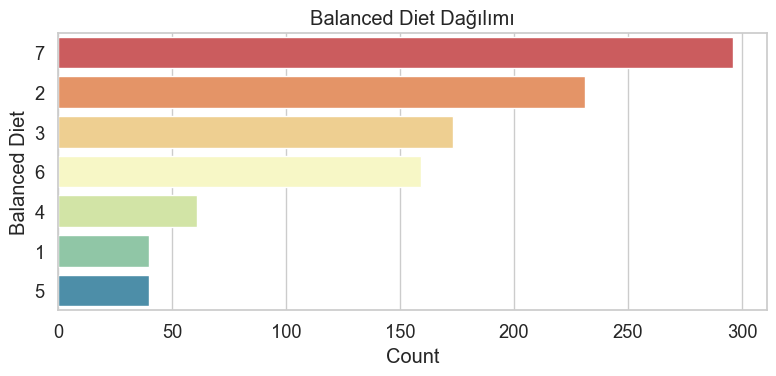

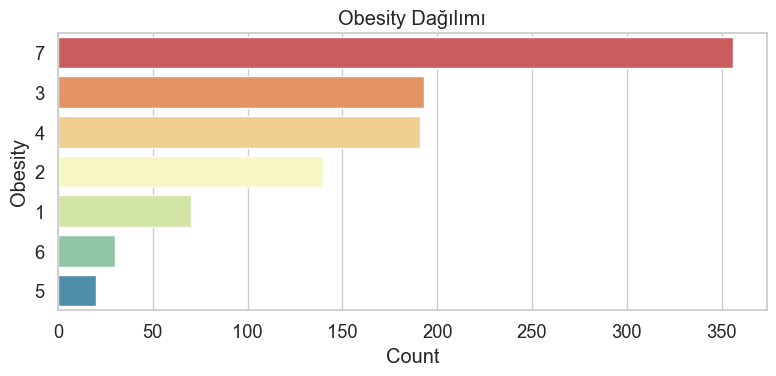

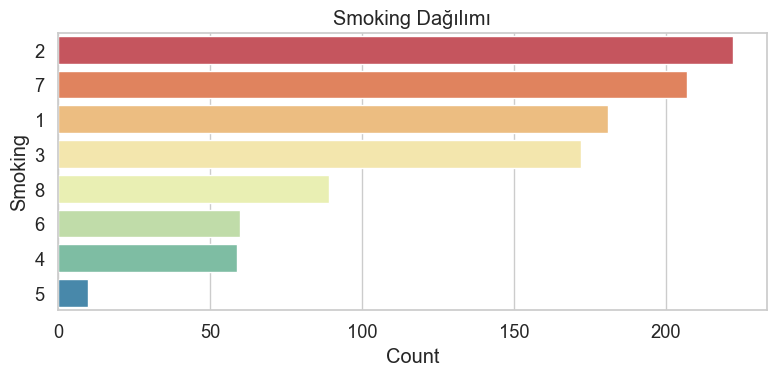

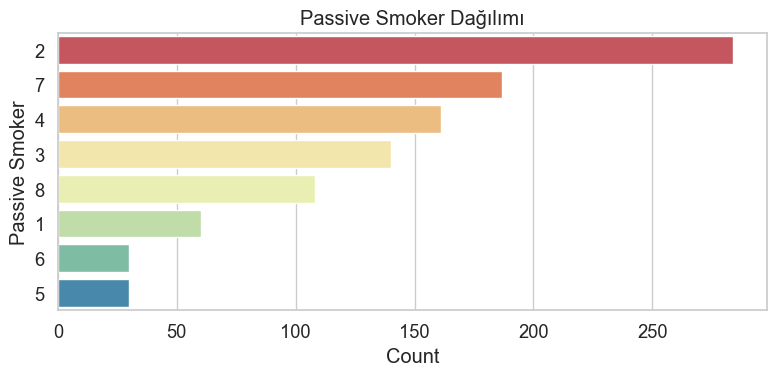

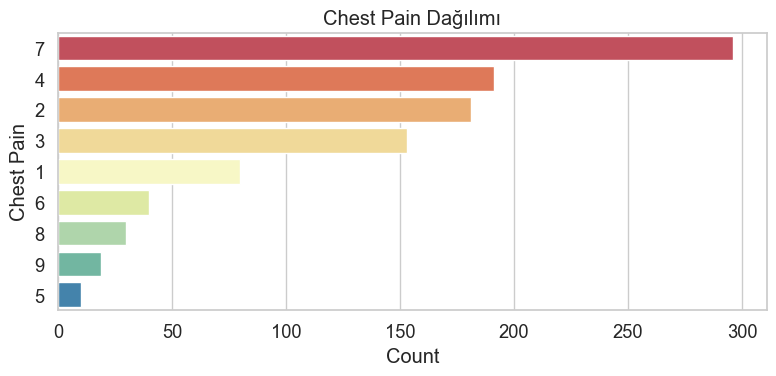

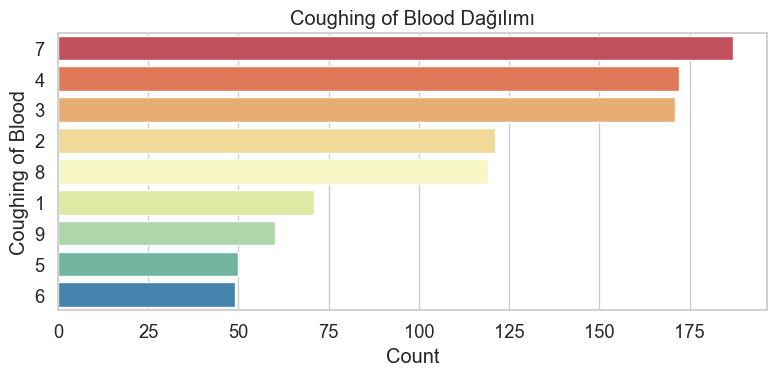

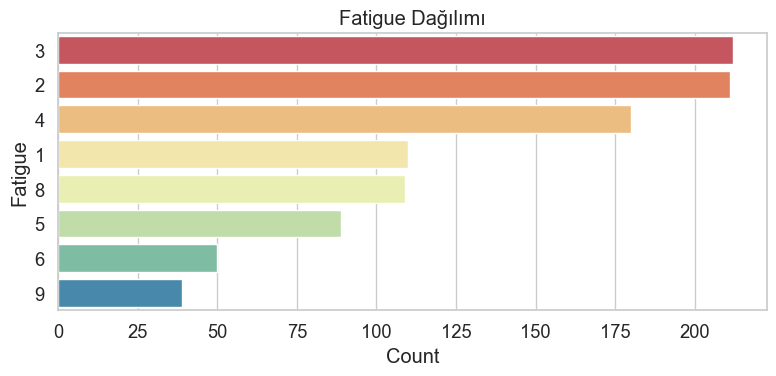

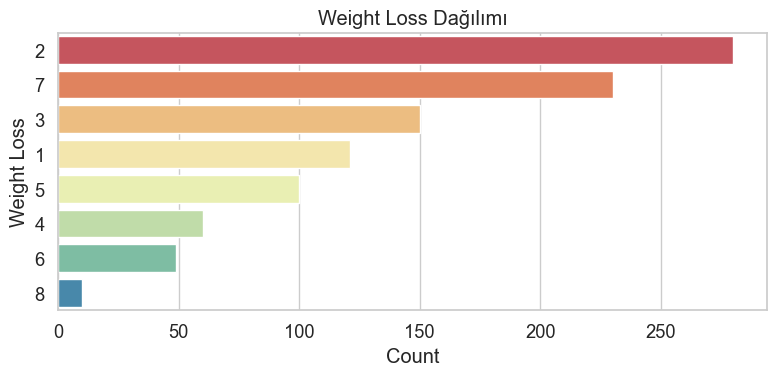

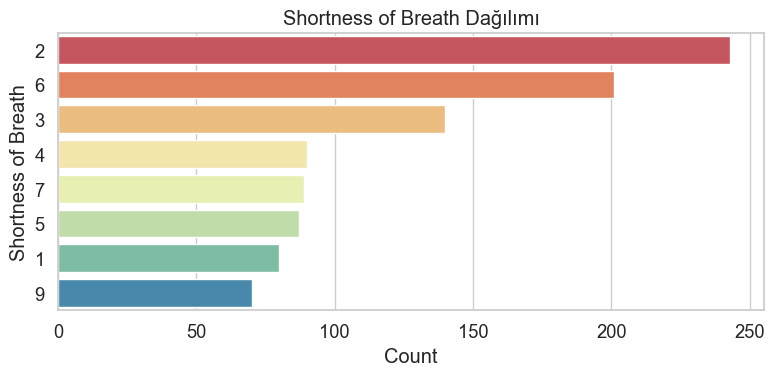

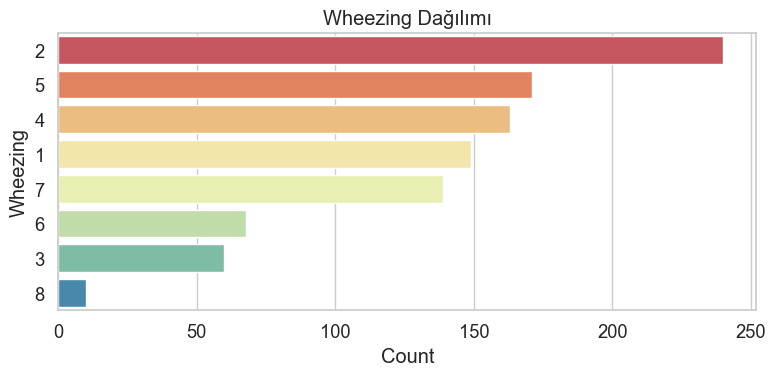

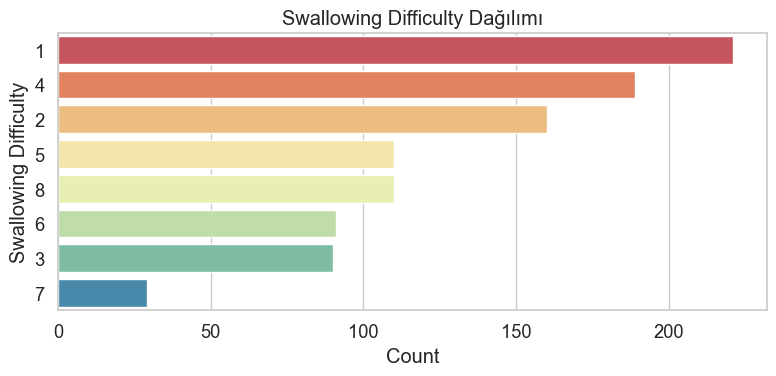

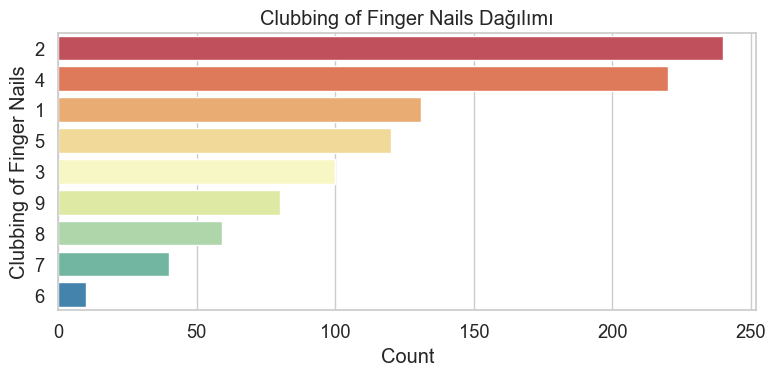

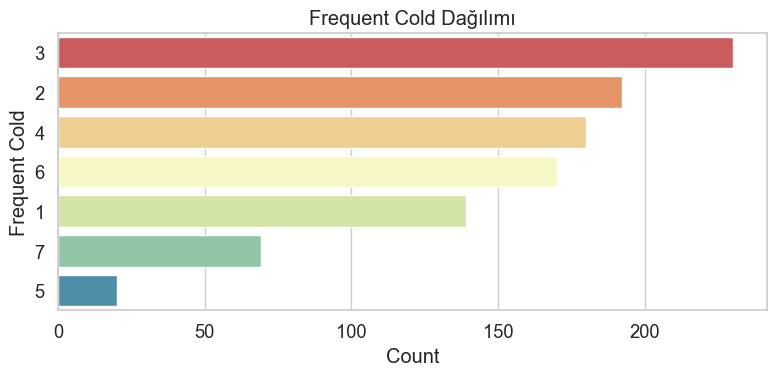

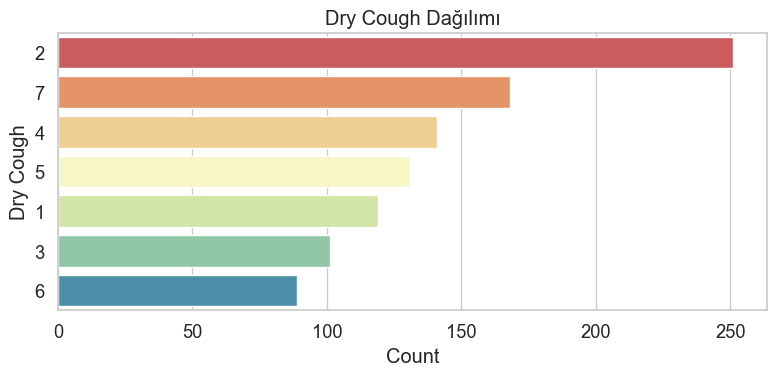

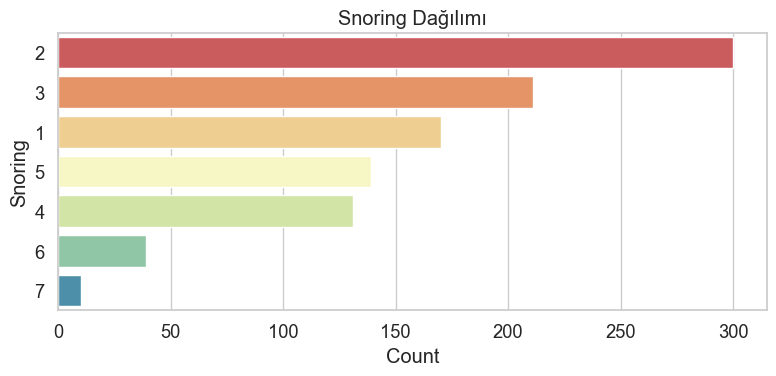

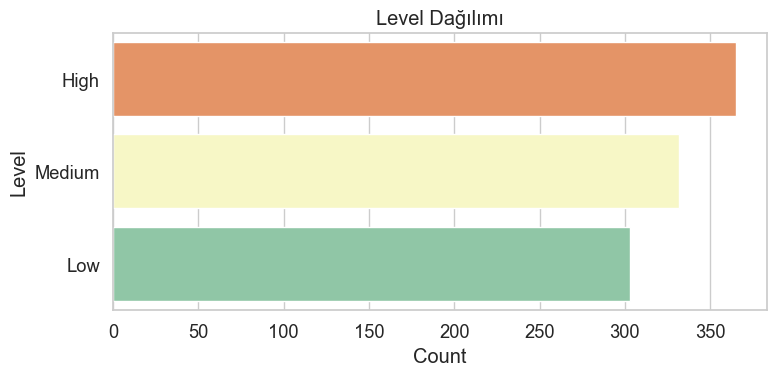

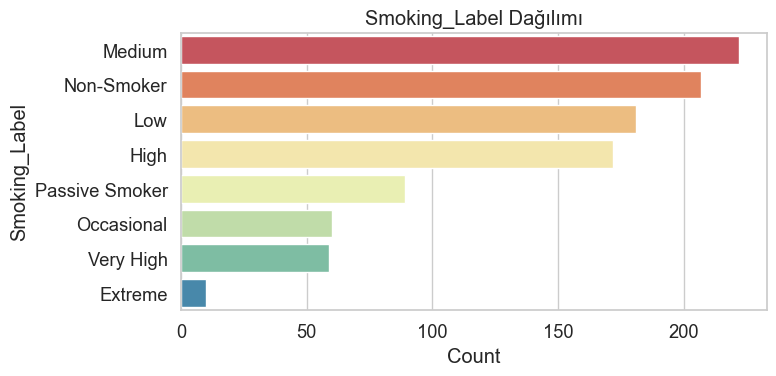

In [125]:
categorical_cols = [
    'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
    'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
    'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker',
    'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
    'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty',
    'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough',
    'Snoring', 'Level', 'Smoking_Label'
]
df[categorical_cols] = df[categorical_cols].astype('category')

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        palette="Spectral"
    )
    plt.title(f"{col} Dağılımı")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


    # kategorik değişkenlere ait count bilgileri için grafikler elde edildi.


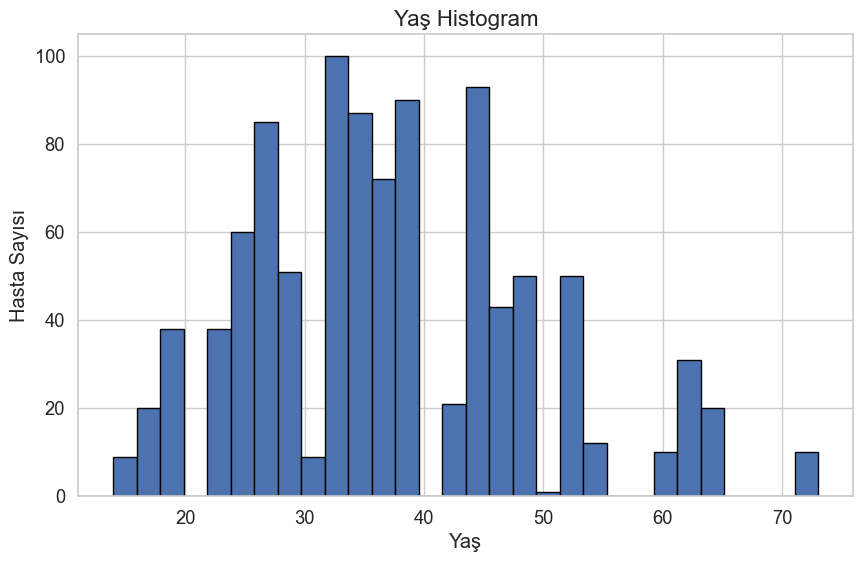

In [130]:
plt.figure(figsize=(10,6))
plt.hist(df["Age"], bins=30, edgecolor='black')
plt.title("Yaş Histogram", fontsize=16)
plt.xlabel("Yaş")
plt.ylabel("Hasta Sayısı")
plt.savefig("../docs/age_hist.png", dpi=150, bbox_inches="tight")
plt.show()
    
    #  Sayısal değişken için histogram grafiği çıkarıldı.


Veri setimize göre 1000 kişide 365 kişi yüksek, 332 kişi orta ve 303 kişi düşük seviye akciğer kanseri bulgularına rastlanmıştır.

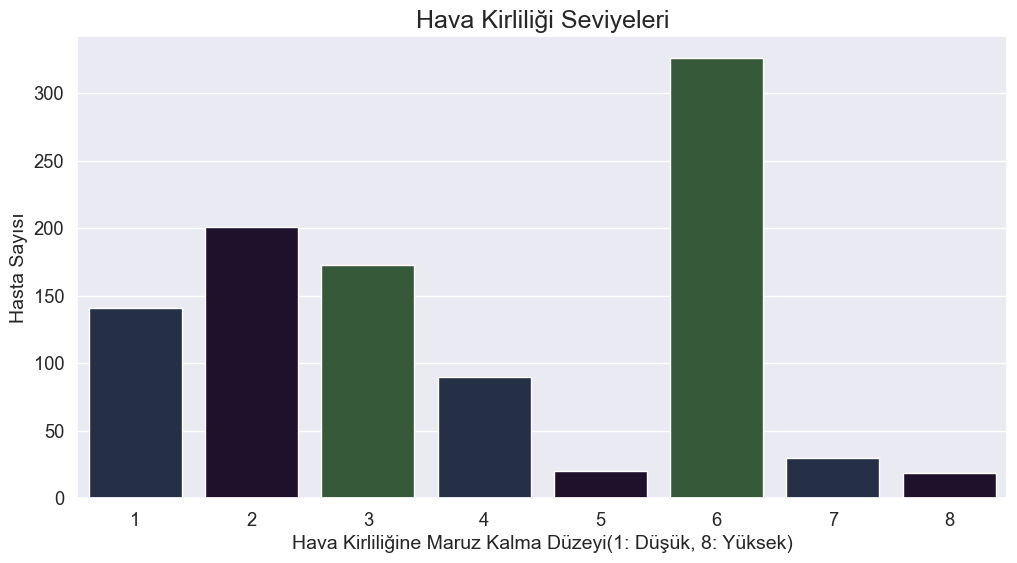

In [112]:
# Akciğer kanserinin olası nedenlerinden biri olan hava kirliliğinin kaç hastada hangi seviyelerde görüldüğüne bakıldı.
#  Histogram grafiği çizildi.


sns.set(style="darkgrid", font_scale=1.2)

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    x="Air Pollution",
    palette=["#202D4B", "#1E0D30", "#305F35"])


plt.title('Hava Kirliliği Seviyeleri',fontsize=18)
plt.xlabel("Hava Kirliliğine Maruz Kalma Düzeyi(1: Düşük, 8: Yüksek)", fontsize=14)
plt.ylabel("Hasta Sayısı", fontsize=14)
plt.show()


Hava kirliliğine bağlı hasta olan kişilerin sayısına bakıldığında 6. seviye hava kirliliğine maruz kalan hasta sayısı
diğer seviyelere göre daha yüksektir.

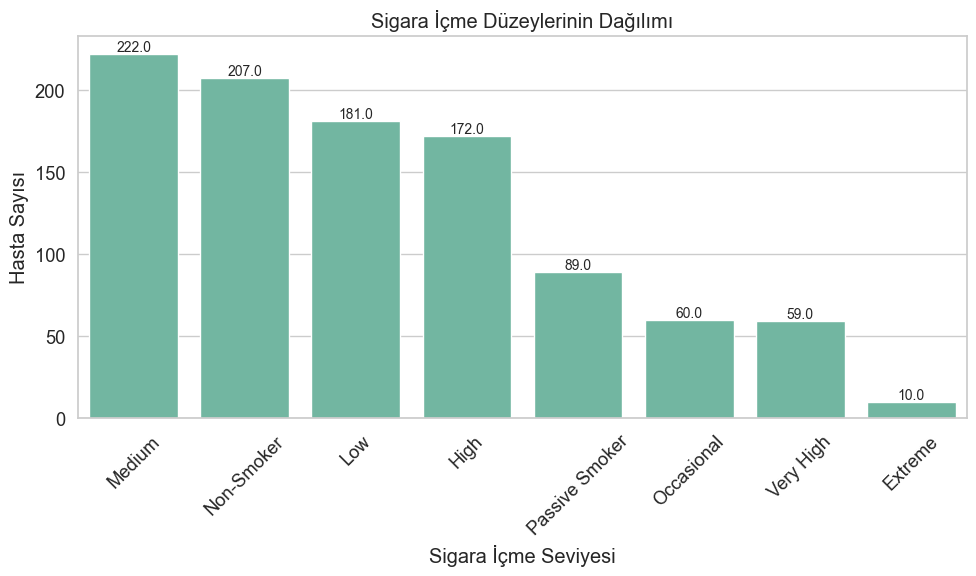

In [113]:
#  Sigara içenlerin düzeylerine göre hasta sayısına bakıldı.

smoking_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High',
    5: 'Extreme',
    6: 'Occasional',
    7: 'Non-Smoker',
    8: 'Passive Smoker'
}

df['Smoking_Label'] = df['Smoking'].map(smoking_labels)

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_palette('Set2')

ax = sns.countplot(x='Smoking_Label', data=df, order=df['Smoking_Label'].value_counts().index)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Sigara İçme Düzeylerinin Dağılımı')
plt.xlabel('Sigara İçme Seviyesi')
plt.ylabel('Hasta Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sigara içen kişileriçin kontrol edildiğinde ortalama içicilerin daha yüksek akciger kanseri olma durumu vardır.

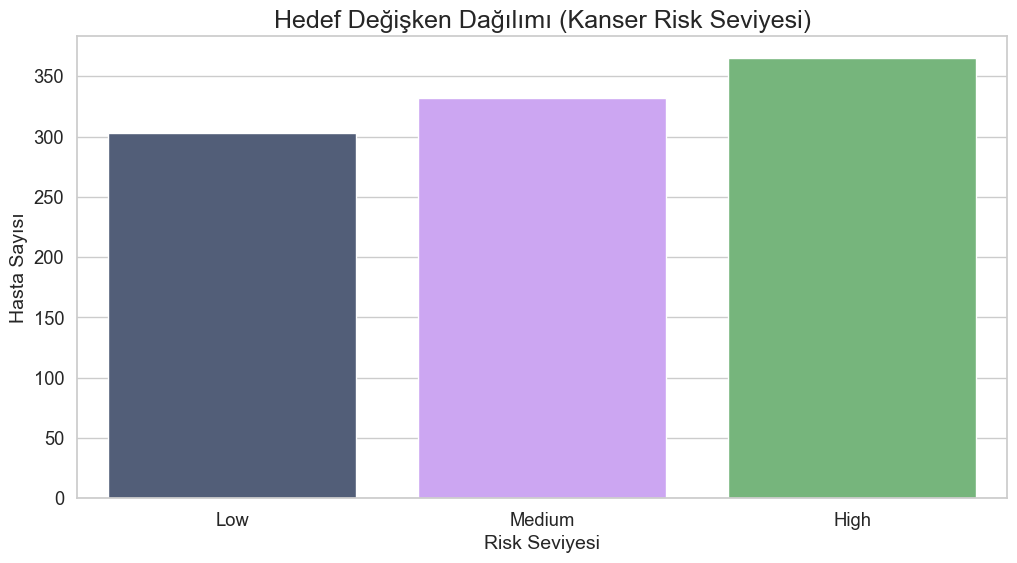

In [114]:
#  Hedef değişken için çubuk grafik oluşturalım.

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    x="Level",
    palette=["#4C5B7E", "#CC99FF", "#6BBF73"]
)

plt.title("Hedef Değişken Dağılımı (Kanser Risk Seviyesi)", fontsize=18)
plt.xlabel("Risk Seviyesi", fontsize=14)
plt.ylabel("Hasta Sayısı", fontsize=14)
plt.show()

Hedef değişkenin dağılımına bakacak olursak üksek seviye hastalar daha çoğunluktadır.

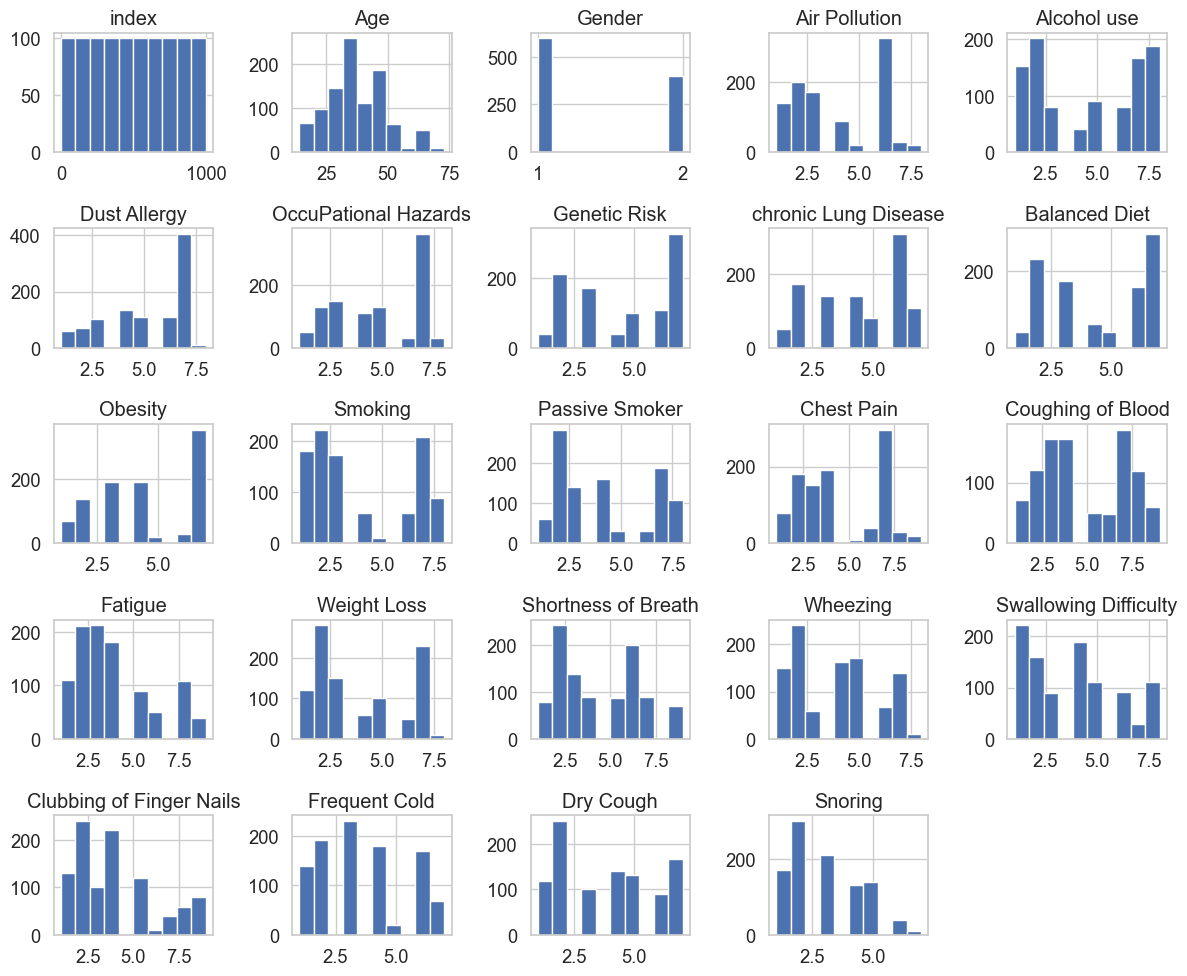

In [115]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


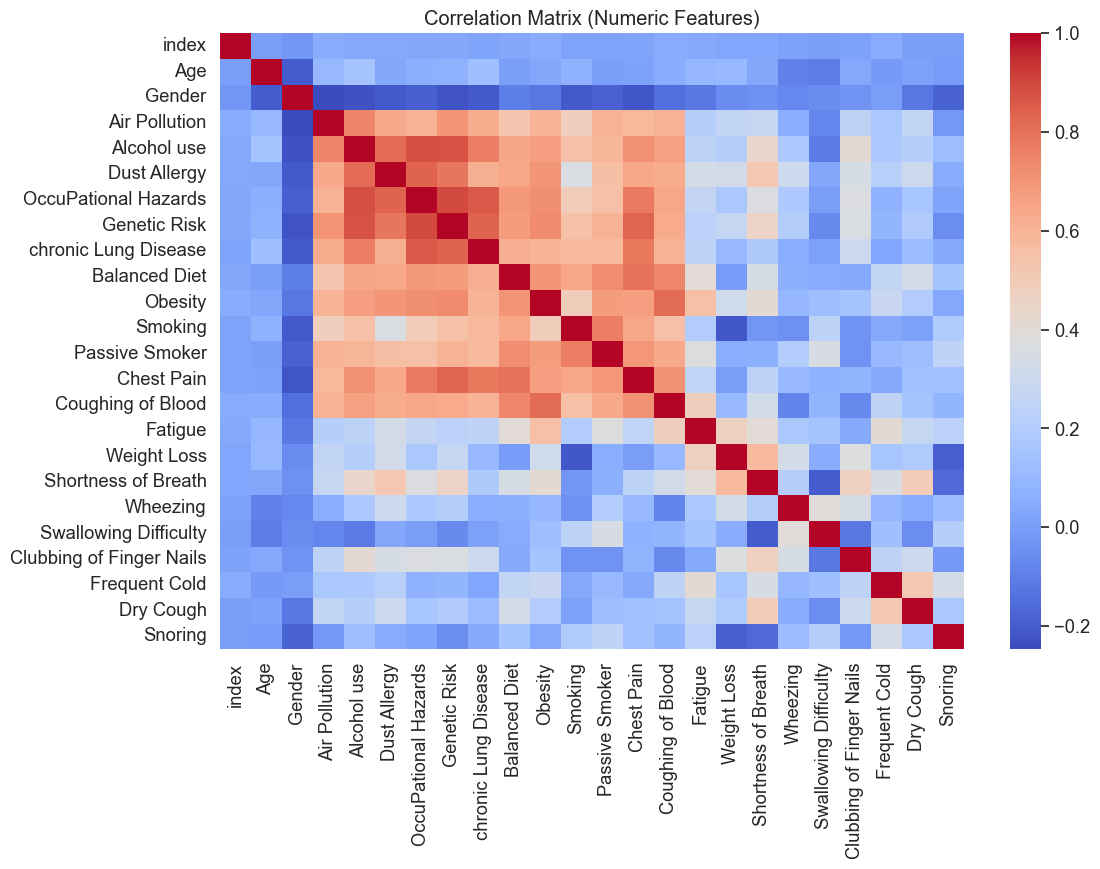

In [116]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')

plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# Sadece numeric veriler için korelasyon ilişkisine bakıldı.

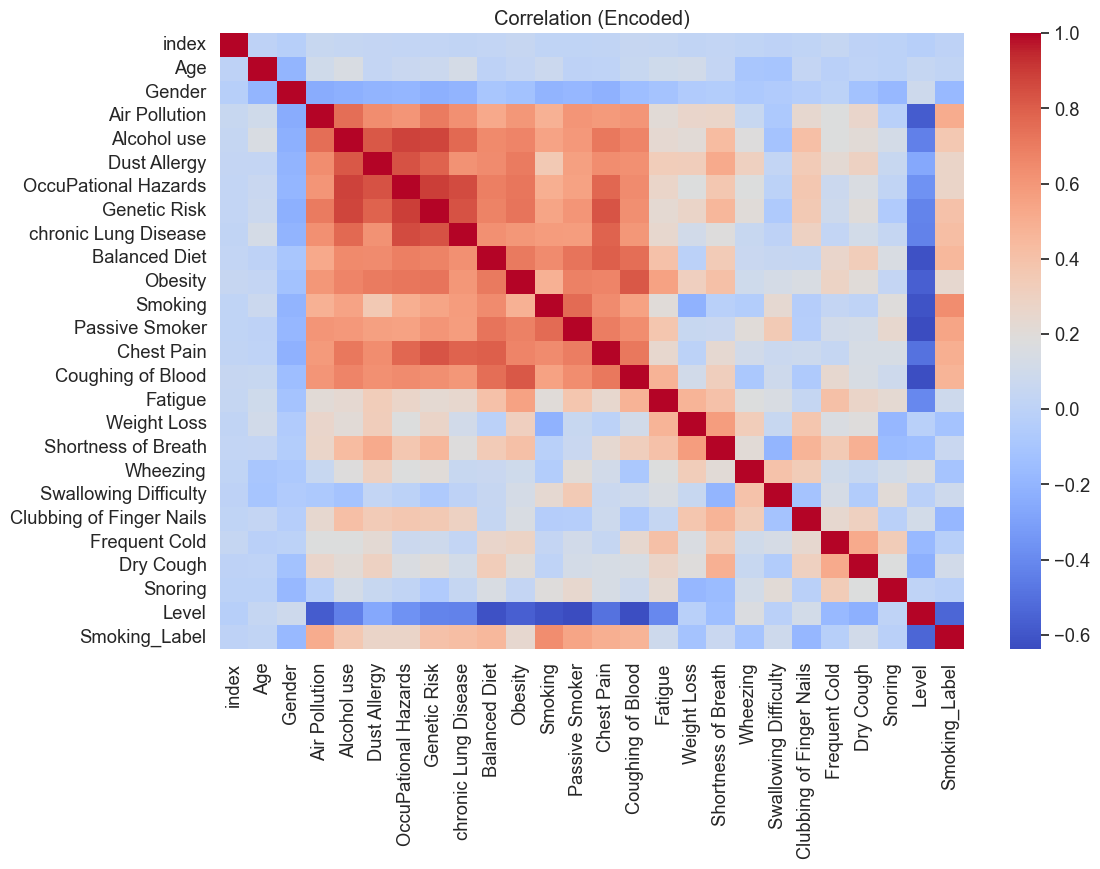

In [117]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Correlation (Encoded)")
plt.show()

# Kategorik değişkenler encode edilerek korelasyon ilişkisine bakıldı.


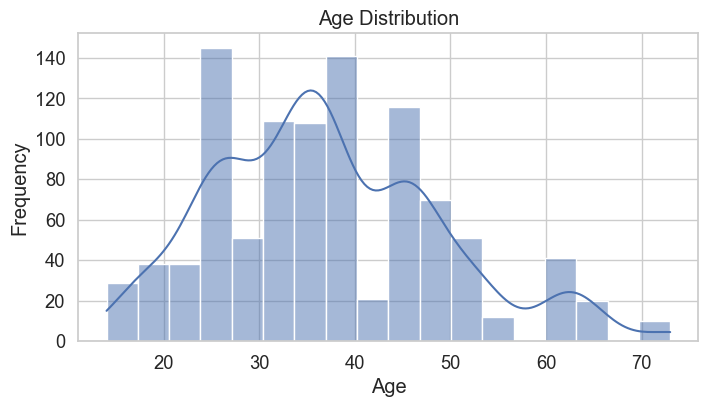

In [134]:
# Yaş dağılımına bakıldı. Simetrik mi yas arttokça hastalık riski var mı? Kontrol edildi. 
# Yaş dağılımı mükemmel simetrik değil

# Hafif sağa çarpık (right-skewed), yani genç bireyler daha fazla, yaş arttıkça kişi sayısı azalıyor


plt.figure(figsize=(8,4))
sns.histplot(
    data=df['Age'],
    kde=True
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


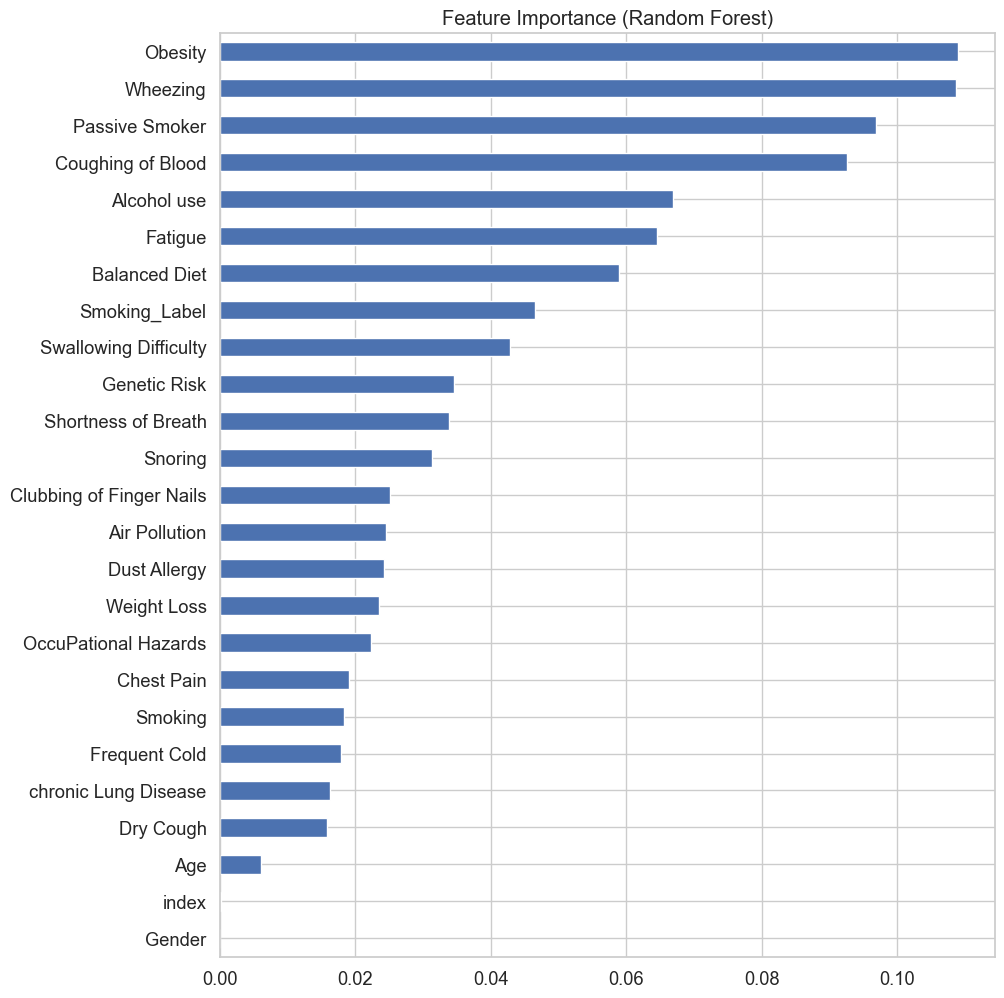

In [147]:
# Target kolonunu tespit edelim
target = "Level"   

# Encode kategorikler
X = df.drop(target, axis=1)
y = df[target]

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object','category']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances.sort_values().plot(kind="barh", figsize=(10,12))
plt.title("Feature Importance (Random Forest)")
plt.show()

plt.savefig("../docs/PNG/feature_importance.png", dpi=300, bbox_inches='tight')
plt.close()